# Regresion Lineal comprobando relacion entre la distancia y el tiempo

### Comprobamos la relacion lineal existente entre el tiempo y la distancia recorrida por un objeto que se mueve a velocidad constante.

In [479]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [480]:
tiempo = np.array(range(1,30))
distancia = np.array(range(10, 300, 10))


In [481]:
velocidad = distancia/tiempo

In [482]:
velocidad

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10.])

In [483]:
data = pd.DataFrame({
    'velocidad':velocidad,
    'tiempo':tiempo,
    'distancia': distancia
})

In [484]:
data.shape

(29, 3)

In [485]:
data.head()

,velocidad,tiempo,distancia
0,10.0,1,10
1,10.0,2,20
2,10.0,3,30
3,10.0,4,40
4,10.0,5,50


In [486]:
data.corr()

,velocidad,tiempo,distancia
velocidad,NaN,NaN,NaN
tiempo,NaN,1.0,1.0
distancia,NaN,1.0,1.0


In [487]:
# Este metodo usa la extracion de los datos con la distribucion normal.

# a = np.random.randn(len(data)) # una distribucion normal para dividir aleatoriamente los datos de entrenamiento del modelo de los datos de testing relacion 80% y 20 %
# check_down = (a < 0.8)
# check_up = (a > 0.8)
# len(a[check_down])#24
# len(a[check_up])#25

# #data_training = data[check_down]# aproximadamente el 80%
# #data_testing = data[check_up] # aprozximadamente el 20%

In [488]:


# este metodo hace lo mismo pero usando la librerias 
data_training, data_testing = train_test_split(data, test_size=0.2)


In [489]:
len(data_training)

23

In [490]:
len(data_testing)

6

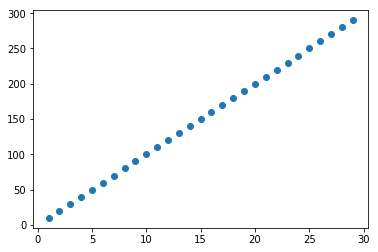

In [491]:
plt.scatter(tiempo, distancia)

In [492]:
x_train = pd.DataFrame(data_training['tiempo'], columns= ['tiempo'])
y_train = pd.DataFrame(data_training['distancia'], columns = ['distancia'])
y_test= pd.DataFrame(data_testing['distancia'], columns = ['distancia'])
x_test = pd.DataFrame({ 'tiempo': data_testing['tiempo']})

In [493]:
modelo  = linear_model.LinearRegression()

In [494]:
modelo.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [495]:
y_pred = modelo.predict(x_test)

In [496]:
y_pred

array([[ 60.],
       [160.],
       [140.],
       [ 10.],
       [230.],
       [260.]])

In [497]:
print('Error cuadrático medio: %.2f' % mean_squared_error(y_test, y_pred))
print('Estadístico R_2: %.2f' % r2_score(y_test, y_pred))

print('Coeficiente Intercepcion beta 0 (w0)', modelo.intercept_[0])
print('Coeficiente  beta 1 (w1)', modelo.coef_[0])

Error cuadrático medio: 0.00
Estadístico R_2: 1.00
Coeficiente Intercepcion beta 0 (w0) -5.684341886080802e-14
Coeficiente  beta 1 (w1) [10.]


In [498]:
test = np.array(data['tiempo'])
x_inicio = test[0]
x_final= test[len(test)-1]
w1 = modelo.coef_[0]
w0 = modelo.intercept_[0]

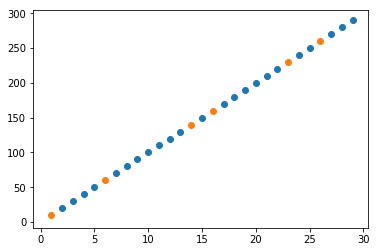

In [499]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_pred)
plt.show()

Nota: Coeficiente  beta 1 (w1) [10.] resulta ser la pendiente de la grafica, m = dy/dx, en este caso la pendiente tambien resulta ser la velocidad = distancia / tiempo

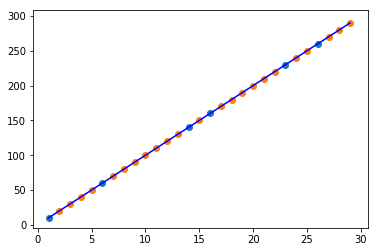

In [500]:
plt.scatter(x_test, y_test)
plt.scatter(x_train, y_train)
x_pred = np.array([x_inicio, x_final])
y_pred =  np.array([w0+w1*x_inicio, w0+w1*x_final])
plt.plot(x_pred, y_pred, color='blue')
plt.show()